For linear regression it is preferable that each of the parameters is fitted to a normal distribution. We can see below that this is not the case for pressure. Does the x-variable follow a normal distribution?

We can transform parameters to make their distrubution more "normal". One simple transfromation is to use the logarithm.

In [1]:
df <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)

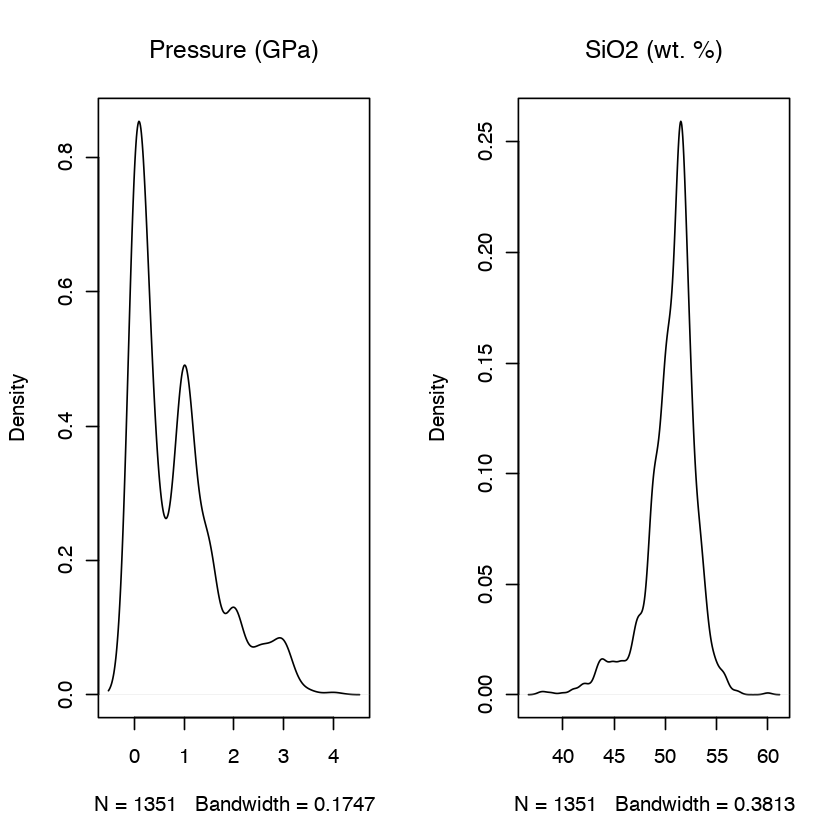

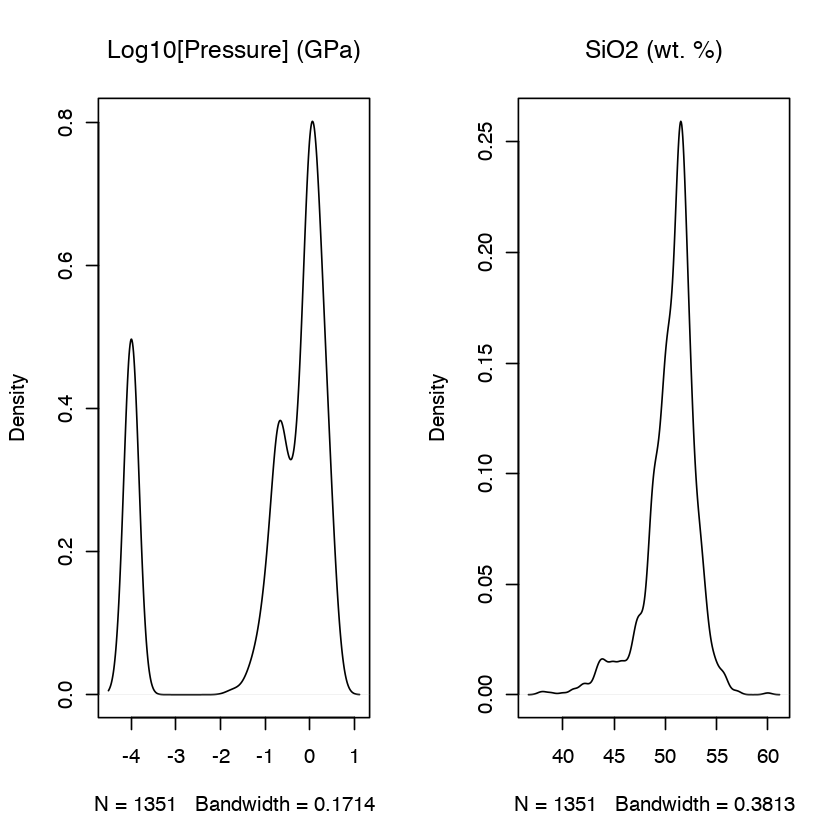

In [2]:
Y <- df$P_GPa
X <- df$SiO2.cpx
ylab <- "Pressure (GPa)"
xlab <- "SiO2 (wt. %)"

model.data <- data.frame(Y,X)

par(mfrow=c(1,2))
plot(density(Y),main=ylab)
plot(density(X),main=xlab)

par(mfrow=c(1,2))
plot(density(log10(Y)),main="Log10[Pressure] (GPa)")
plot(density(X),main=xlab)

We can see that the plot of Log<sub>10</sub>(Pressure) that there are actually two normal distributions in the data.

Therefore, below we subset the data and fit a regression to experiments with pressures greater than 10<sup>-3</sup> GPa:


Call:
lm(formula = Y ~ X, data = model.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2134 -0.5590 -0.1381  0.3872  2.6515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.22226    0.53153  -6.062 1.86e-09 ***
X            0.08418    0.01050   8.018 2.83e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.789 on 1060 degrees of freedom
Multiple R-squared:  0.05718,	Adjusted R-squared:  0.05629 
F-statistic: 64.28 on 1 and 1060 DF,  p-value: 2.83e-15


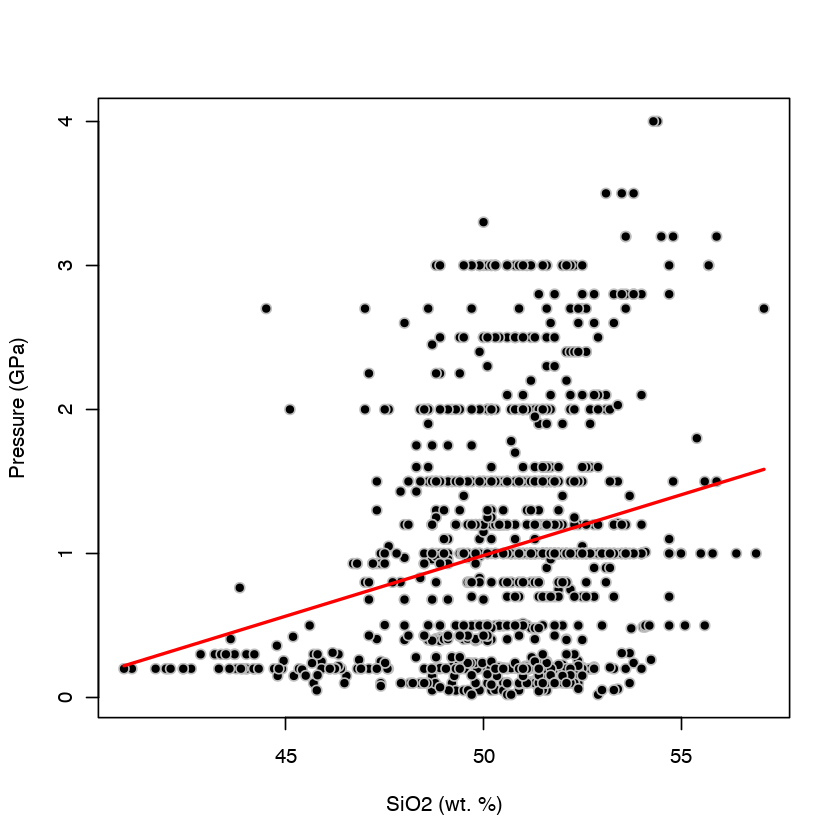

In [3]:
ID <- which(log10(model.data$Y) > -3)
model.data <- model.data[ID,]

linearMod <- lm(Y ~ X, data=model.data)
summary(linearMod)

plot(model.data$X,model.data$Y,pch=21,col="grey",bg="black",xlab=xlab,ylab=ylab)
lines(sort(model.data$X), fitted(linearMod)[order(model.data$X)], col='red', type='l',lwd=2) 

Alternatively, we can perform the regression on the Log<sub>10</sub>(Pressure):


Call:
lm(formula = Y ~ X, data = model.data.subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64349 -0.24916  0.09731  0.31082  0.87574 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.504583   0.292673  -8.558  < 2e-16 ***
X            0.046297   0.005781   8.009 3.03e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4344 on 1060 degrees of freedom
Multiple R-squared:  0.05706,	Adjusted R-squared:  0.05617 
F-statistic: 64.14 on 1 and 1060 DF,  p-value: 3.034e-15


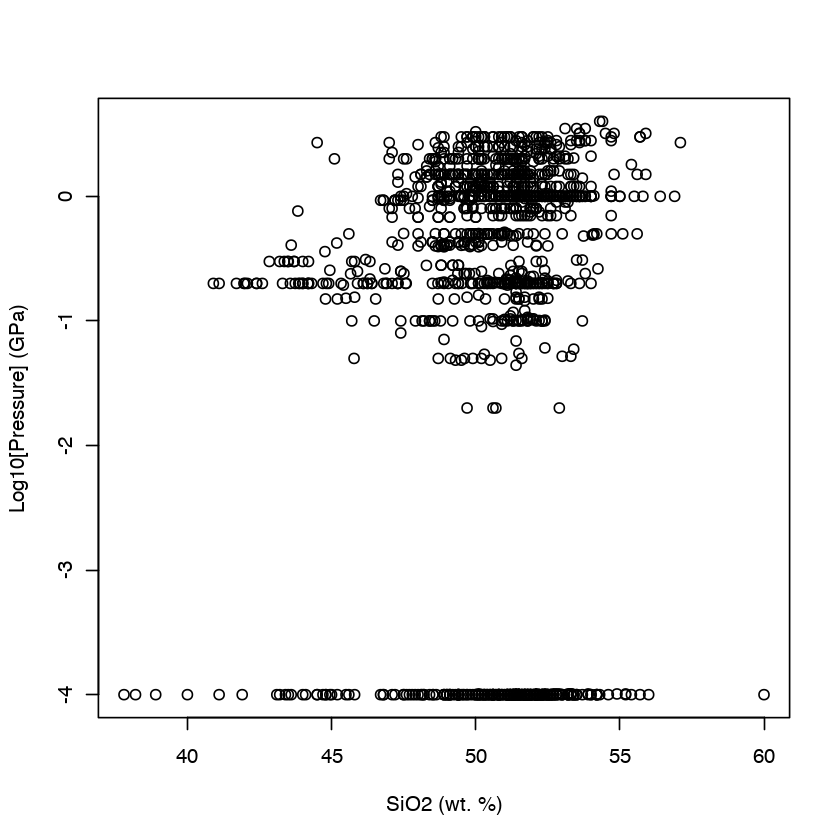

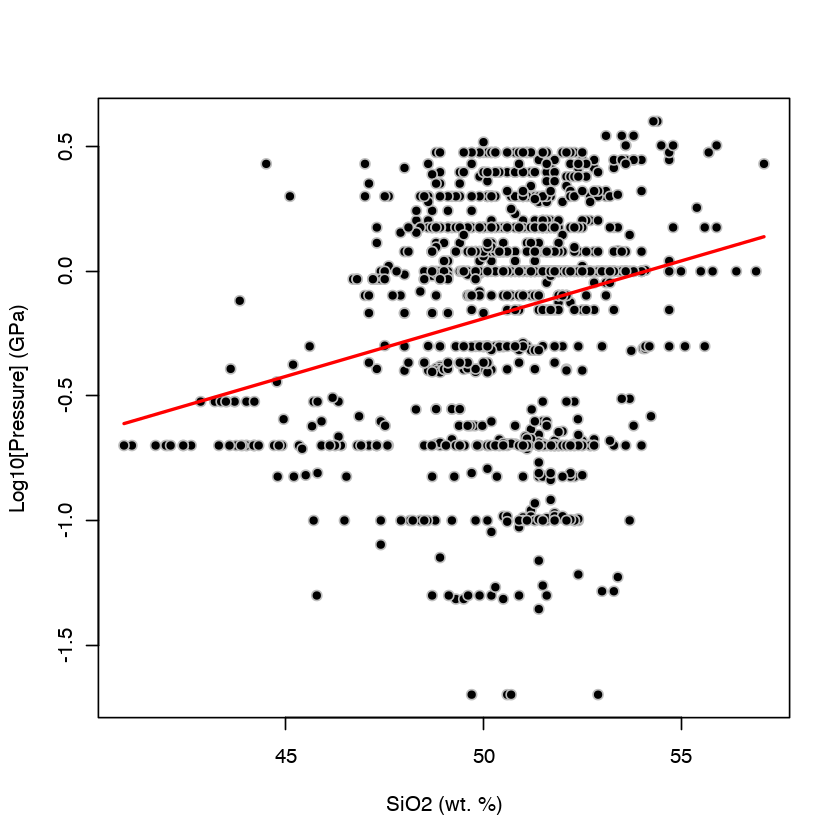

In [4]:
Y <- log10(df$P_GPa)
X <- df$SiO2.cpx
ylab <- "Log10[Pressure] (GPa)"
xlab <- "SiO2 (wt. %)"

plot(X,Y,xlab=xlab,ylab=ylab)

model.data <- data.frame(Y,X)

ID <- which(model.data$Y > -3)
model.data.subset <- model.data[ID,]

linearMod <- lm(Y ~ X, data=model.data.subset)
summary(linearMod)

plot(model.data.subset$X,model.data.subset$Y,pch=21,col="grey",bg="black",xlab=xlab,ylab=ylab)
lines(sort(model.data.subset$X), fitted(linearMod)[order(model.data.subset$X)], col='red', type='l',lwd=2) 